# Problem Statement
#### Predict the house price in Bengaluru. Data is collected from machine hack. https://machinehack.com/hackathons/predicting_house_prices_in_bengaluru/data

In [1]:
#preprocessing libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#modelling and metrics libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [36]:
#read the dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train_orig = train.copy()
test_orig = test.copy()

In [37]:
train.shape, test.shape

((13320, 9), (1480, 9))

In [7]:
train.index, test.index

(RangeIndex(start=0, stop=13320, step=1),
 RangeIndex(start=0, stop=1480, step=1))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     1480 non-null   object 
 1   availability  1480 non-null   object 
 2   location      1480 non-null   object 
 3   size          1478 non-null   object 
 4   society       854 non-null    object 
 5   total_sqft    1480 non-null   object 
 6   bath          1473 non-null   float64
 7   balcony       1411 non-null   float64
 8   price         0 non-null      float64
dtypes: float64(3), object(6)
memory usage: 104.2+ KB


In [10]:
train.columns.difference(test.columns)

Index([], dtype='object')

In [12]:
train.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [13]:
test.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN


In [19]:
train.isna().sum(),train.isna().sum()*100/train.shape[0]

(area_type          0
 availability       0
 location           1
 size              16
 society         5502
 total_sqft         0
 bath              73
 balcony          609
 price              0
 dtype: int64,
 area_type        0.000000
 availability     0.000000
 location         0.007508
 size             0.120120
 society         41.306306
 total_sqft       0.000000
 bath             0.548048
 balcony          4.572072
 price            0.000000
 dtype: float64)

In [20]:
test.isna().sum(),test.isna().sum()*100/test.shape[0]

(area_type          0
 availability       0
 location           0
 size               2
 society          626
 total_sqft         0
 bath               7
 balcony           69
 price           1480
 dtype: int64,
 area_type         0.000000
 availability      0.000000
 location          0.000000
 size              0.135135
 society          42.297297
 total_sqft        0.000000
 bath              0.472973
 balcony           4.662162
 price           100.000000
 dtype: float64)

In [25]:
train.duplicated().sum(),test.duplicated().sum()

(529, 33)

In [26]:
train[train.duplicated()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
971,Super built-up Area,Ready To Move,Haralur Road,3 BHK,NRowse,1464,3.0,2.0,56.0
1115,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44.0
1143,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,64.5
1290,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1194,2.0,2.0,47.0
1394,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44.0
...,...,...,...,...,...,...,...,...,...
13285,Super built-up Area,Ready To Move,VHBCS Layout,2 BHK,OlarkLa,1353,2.0,2.0,110.0
13299,Super built-up Area,18-Dec,Whitefield,4 BHK,Prtates,2830 - 2882,5.0,0.0,154.5
13311,Plot Area,Ready To Move,Ramamurthy Nagar,7 Bedroom,NaN,1500,9.0,2.0,250.0
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.0


In [34]:
test[test.duplicated()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,source
135,Super built-up Area,Ready To Move,Bhoganhalli,4 BHK,Pride S,2439,4.0,3.0,NaN,test
197,Super built-up Area,Ready To Move,Kogilu,2 BHK,NaN,1170,2.0,2.0,NaN,test
255,Super built-up Area,22-May,Jakkur,3 BHK,SoineC,1819.18,3.0,2.0,NaN,test
421,Super built-up Area,Ready To Move,Dasarahalli,3 BHK,Sooneoo,1902.55,3.0,2.0,NaN,test
488,Super built-up Area,Ready To Move,Banashankari Stage III,3 BHK,Pridsi,1260,2.0,1.0,NaN,test
521,Super built-up Area,Ready To Move,Bisuvanahalli,2 BHK,Prityel,845,2.0,1.0,NaN,test
530,Super built-up Area,Ready To Move,Budigere,2 BHK,PrityTr,1153,2.0,2.0,NaN,test
604,Super built-up Area,Ready To Move,Akshaya Nagar,3 BHK,DLhtsnd,1410,2.0,2.0,NaN,test
663,Super built-up Area,Ready To Move,Rachenahalli,2 BHK,NaN,1050,2.0,2.0,NaN,test
687,Super built-up Area,Ready To Move,Rachenahalli,2 BHK,NaN,1050,2.0,2.0,NaN,test


In [38]:
train.drop_duplicates(inplace=True)
#test.drop_duplicates(inplace=True)
train.duplicated().sum(),test.duplicated().sum()

(0, 33)

In [202]:
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train,test])
data.shape

(14271, 10)

In [41]:
data.duplicated().sum()

33

In [42]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,source
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,train
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,train
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,train
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,train
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,train


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14271 entries, 0 to 1479
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     14271 non-null  object 
 1   availability  14271 non-null  object 
 2   location      14270 non-null  object 
 3   size          14253 non-null  object 
 4   society       8317 non-null   object 
 5   total_sqft    14271 non-null  object 
 6   bath          14191 non-null  float64
 7   balcony       13597 non-null  float64
 8   price         12791 non-null  float64
 9   source        14271 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.2+ MB


In [45]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,14191.0,2.713269,1.35856,1.0,2.0,2.0,3.0,40.0
balcony,13597.0,1.580202,0.82393,0.0,1.0,2.0,2.0,3.0
price,12791.0,114.317646,151.48031,8.0,50.0,73.0,121.0,3600.0


In [47]:
data.describe(exclude=np.number).T

,count,unique,top,freq
area_type,14271,4,Super built-up Area,9263
availability,14271,82,Ready To Move,11334
location,14270,1358,Whitefield,574
size,14253,32,2 BHK,5471
society,8317,2832,GrrvaGr,80
total_sqft,14271,2221,1200,905
source,14271,2,train,12791


In [50]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price', 'source'],
      dtype='object')

In [117]:
data.isna().sum()

area_type          0
availability       0
location           1
size              18
society         5954
total_sqft         0
bath              80
balcony          674
price           1480
source             0
dtype: int64

In [54]:
[display(data[i].value_counts()) for i in data.columns if data[i].nunique()<30]

Super built-up  Area    9263
Built-up  Area          2668
Plot  Area              2243
Carpet  Area              97
Name: area_type, dtype: int64

2.0     7290
3.0     3551
4.0     1347
1.0      845
5.0      582
6.0      301
7.0      113
8.0       73
9.0       51
10.0      17
12.0       7
13.0       3
11.0       3
16.0       3
27.0       1
18.0       1
40.0       1
15.0       1
14.0       1
Name: bath, dtype: int64

2.0    5391
1.0    5247
3.0    1819
0.0    1140
Name: balcony, dtype: int64

train    12791
test      1480
Name: source, dtype: int64

[None, None, None, None]

In [86]:
data['availability'].nunique(), data['availability'].value_counts(), 
data[data['availability']!='Ready To Move']['availability'].value_counts()#,
#data[data['availability']!='Ready To Move']['availability'].value_counts(bins=12)

18-Dec    328
18-May    321
18-Apr    294
18-Aug    212
19-Dec    209
         ... 
14-Jul      1
15-Aug      1
16-Apr      1
16-Oct      1
14-Nov      1
Name: availability, Length: 81, dtype: int64

In [78]:
data['location'].nunique(), data['location'].value_counts()
#, data[data['availability']!='Ready To Move']['availability'].value_counts()

(1358,
 Whitefield                                         True
 Sarjapur  Road                                     True
 Electronic City                                    True
 Kanakpura Road                                     True
 Thanisandra                                        True
                                                   ...  
 near Ramanashree California resort                False
 Badrappa Layout                                   False
 KAS Officers Colony                               False
 Ananthanagar Phase 1,Electronic City , phase 2    False
 TR Mill Road, Chamarajpet                         False
 Name: location, Length: 1358, dtype: bool)

In [96]:
data['location'].value_counts()
data.location.value_counts().reset_index(name="count").query("count > 75")#["index"]

,index,count
0,Whitefield,574
1,Sarjapur Road,417
2,Electronic City,322
3,Kanakpura Road,274
4,Thanisandra,272
5,Yelahanka,223
6,Marathahalli,183
7,Hebbal,181
8,Uttarahalli,179
9,Raja Rajeshwari Nagar,179


In [100]:
data['size'].nunique(), data['size'].value_counts()

(32,
 2 BHK         5471
 3 BHK         4598
 4 Bedroom      916
 4 BHK          656
 3 Bedroom      601
 1 BHK          575
 2 Bedroom      353
 5 Bedroom      332
 6 Bedroom      208
 1 Bedroom      121
 8 Bedroom       94
 7 Bedroom       94
 5 BHK           61
 9 Bedroom       54
 6 BHK           35
 7 BHK           18
 10 Bedroom      15
 1 RK            15
 9 BHK           13
 8 BHK            8
 11 BHK           2
 10 BHK           2
 11 Bedroom       2
 14 BHK           1
 18 Bedroom       1
 16 BHK           1
 16 Bedroom       1
 13 BHK           1
 43 Bedroom       1
 27 BHK           1
 19 BHK           1
 12 Bedroom       1
 Name: size, dtype: int64)

In [102]:
data['society'].nunique(), data['society'].value_counts()

(2832,
 GrrvaGr    80
 PrarePa    65
 Bhmesy     63
 Sryalan    60
 Prtates    59
            ..
 GradeMR     1
 Wharl P     1
 MaaveDu     1
 Vencyha     1
 MyeurGr     1
 Name: society, Length: 2832, dtype: int64)

In [108]:
data.groupby(['society','location']).size()

society  location             
3Codeli  Mahadevpura              3
7 ise P  Raja Rajeshwari Nagar    1
A idse   Malleshpalya             2
A rtsai  Konanakunte              1
ACersd   Padmanabhanagar          1
                                 ..
Zostaa   Haralur Road             3
i1ncyRe  Gottigere                1
i1odsne  Jigani                   1
i1rtsCo  8th Phase JP Nagar       1
         Raja Rajeshwari Nagar    3
Length: 2886, dtype: int64

In [109]:
data.groupby(['location','society']).size()

location                        society
 Banaswadi                      Krntsee    1
 Bhoganhalli                    Rosha I    2
 Devarabeesana Halli            Sorisa     4
 Devarachikkanahalli            Clntsrt    1
                                Heate L    1
                                          ..
Yeshwanthpur                    VSineDi    1
                                VSlistr    2
                                Vaarai     1
                                Vatra N    1
Yeshwanthpur Industrial Suburb  Essic C    2
Length: 2886, dtype: int64

In [112]:
#plt.scatter(data['location'],data['society'])
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price', 'source'],
      dtype='object')

In [113]:
data['total_sqft'].nunique(), data['total_sqft'].value_counts()

(2221,
 1200           905
 1500           235
 1100           229
 2400           224
 600            198
               ... 
 1691 - 2170      1
 1550 - 1590      1
 977              1
 1152 - 1197      1
 1558             1
 Name: total_sqft, Length: 2221, dtype: int64)

In [114]:
data['bath'].nunique(), data['bath'].value_counts()

(19,
 2.0     7290
 3.0     3551
 4.0     1347
 1.0      845
 5.0      582
 6.0      301
 7.0      113
 8.0       73
 9.0       51
 10.0      17
 12.0       7
 13.0       3
 11.0       3
 16.0       3
 27.0       1
 18.0       1
 40.0       1
 15.0       1
 14.0       1
 Name: bath, dtype: int64)

In [115]:
data['balcony'].nunique(), data['balcony'].value_counts()

(4,
 2.0    5391
 1.0    5247
 3.0    1819
 0.0    1140
 Name: balcony, dtype: int64)

In [118]:
data.isna().sum()

area_type          0
availability       0
location           1
size              18
society         5954
total_sqft         0
bath              80
balcony          674
price           1480
source             0
dtype: int64

In [120]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,source
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,train
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,train
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,train
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,train
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,train


In [119]:
data['size'].nunique(), data['size'].value_counts()

(32,
 2 BHK         5471
 3 BHK         4598
 4 Bedroom      916
 4 BHK          656
 3 Bedroom      601
 1 BHK          575
 2 Bedroom      353
 5 Bedroom      332
 6 Bedroom      208
 1 Bedroom      121
 8 Bedroom       94
 7 Bedroom       94
 5 BHK           61
 9 Bedroom       54
 6 BHK           35
 7 BHK           18
 10 Bedroom      15
 1 RK            15
 9 BHK           13
 8 BHK            8
 11 BHK           2
 10 BHK           2
 11 Bedroom       2
 14 BHK           1
 18 Bedroom       1
 16 BHK           1
 16 Bedroom       1
 13 BHK           1
 43 Bedroom       1
 27 BHK           1
 19 BHK           1
 12 Bedroom       1
 Name: size, dtype: int64)

In [127]:
data[data['size'].isna()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,source
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185,train
1775,Plot Area,Immediate Possession,IVC Road,NaN,Orana N,2000 - 5634,NaN,NaN,124.000,train
2264,Plot Area,Immediate Possession,Banashankari,NaN,NaN,2400,NaN,NaN,460.000,train
2809,Plot Area,Immediate Possession,Sarjapur Road,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785,train
2862,Plot Area,Immediate Possession,Devanahalli,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800,train
5333,Plot Area,Immediate Possession,Devanahalli,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115,train
6423,Plot Area,Immediate Possession,Whitefield,NaN,SRniaGa,2324,NaN,NaN,26.730,train
6636,Plot Area,Immediate Possession,Jigani,NaN,S2enste,1500,NaN,NaN,25.490,train
6719,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545,train
7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,NaN,5000,NaN,NaN,400.000,train


In [132]:
from scipy.stats import mode
data.pivot_table(values="size", index = "total_sqft", aggfunc=(lambda x: mode(x).mode[0]))

,size
total_sqft,
1,4 Bedroom
1.25Acres,2 Bedroom
1.26Acres,1 Bedroom
1000,2 BHK
1000 - 1285,2 BHK
...,...
995,2 BHK
996,2 BHK
997,2 BHK


In [191]:
data['size'] = data['size'].apply(lambda x: str(x).split(' ')[0])

In [196]:
data.loc[(data['size']=='nan'),'size']=0

In [193]:
data.info()
#data['size'].describe()
#data['size'] = data['size'].apply(lambda x: int(x.split(' ')[0]))
#data['size'].nunique(), data['size'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14271 entries, 0 to 1479
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     14271 non-null  object 
 1   availability  14271 non-null  object 
 2   location      14270 non-null  object 
 3   size          14271 non-null  object 
 4   society       8317 non-null   object 
 5   total_sqft    14271 non-null  object 
 6   bath          14191 non-null  float64
 7   balcony       13597 non-null  float64
 8   price         12791 non-null  float64
 9   source        14271 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.2+ MB


In [199]:
data.pivot_table(values="size", index = "total_sqft", aggfunc=(lambda x: mode(x).mode[0]))

,size
total_sqft,
1,4
1.25Acres,2
1.26Acres,1
1000,2
1000 - 1285,2
...,...
995,2
996,2
997,2


In [197]:
data['size'] = data['size'].astype(int)

In [200]:
data.pivot_table(values="size", index = "total_sqft")#, columns = "Outlet_Type")

,size
total_sqft,
1,4.000000
1.25Acres,2.000000
1.26Acres,1.000000
1000,2.597938
1000 - 1285,2.000000
...,...
995,2.100000
996,2.000000
997,2.500000


In [198]:
data[data['size']==0]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,source
579,Plot Area,Immediate Possession,Sarjapur Road,0,Asiss B,1200 - 2400,NaN,NaN,34.185,train
1775,Plot Area,Immediate Possession,IVC Road,0,Orana N,2000 - 5634,NaN,NaN,124.000,train
2264,Plot Area,Immediate Possession,Banashankari,0,NaN,2400,NaN,NaN,460.000,train
2809,Plot Area,Immediate Possession,Sarjapur Road,0,AsdiaAr,1200 - 2400,NaN,NaN,28.785,train
2862,Plot Area,Immediate Possession,Devanahalli,0,Ajleyor,1500 - 2400,NaN,NaN,46.800,train
5333,Plot Area,Immediate Possession,Devanahalli,0,Emngs S,2100 - 5405,NaN,NaN,177.115,train
6423,Plot Area,Immediate Possession,Whitefield,0,SRniaGa,2324,NaN,NaN,26.730,train
6636,Plot Area,Immediate Possession,Jigani,0,S2enste,1500,NaN,NaN,25.490,train
6719,Plot Area,Immediate Possession,Hoskote,0,SJowsn,800 - 2660,NaN,NaN,28.545,train
7680,Plot Area,Immediate Possession,Kasavanhalli,0,NaN,5000,NaN,NaN,400.000,train


In [185]:
#train_orig[train_orig['total_sqft']==0],
#test_orig[test_orig['total_sqft']==0]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price


# try dropping

In [373]:
data = pd.concat([train,test])
data.shape, data.index

((14271, 10),
 Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
             ...
             1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479],
            dtype='int64', length=14271))

In [374]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              18
society         5954
total_sqft         0
bath              80
balcony          674
price           1480
source             0
dtype: int64

In [375]:
data.reset_index(inplace=True)
data.drop(columns='index',inplace=True)
data.shape, data.index

((14271, 10), RangeIndex(start=0, stop=14271, step=1))

In [376]:
data2 = data.drop(columns=['price'])
data2.shape, data2.index
data2 = data2.fillna(method='ffill')
data2.shape, data2.index
#data['location'] = data['location'].dropna()
#data['size'] = data['size'].dropna()
#data['bath'] = data['bath'].dropna()

((14271, 9), RangeIndex(start=0, stop=14271, step=1))

In [377]:
data2.isna().sum().reset_index(name="count").query("count > 0")

,index,count


In [378]:
data2.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,source
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,train
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,train
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Theanmp,1440,2.0,3.0,train
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,train
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Soiewre,1200,2.0,1.0,train


In [379]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,source
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,train
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,train
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,train
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,train
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,train


In [380]:
data3 = pd.concat([data2,data[['price']]], axis=1)
data3.head(), data3.shape, data3.index

(              area_type   availability                  location       size  \
 0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
 1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
 2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
 3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
 4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   
 
    society total_sqft  bath  balcony source   price  
 0  Coomee        1056   2.0      1.0  train   39.07  
 1  Theanmp       2600   5.0      3.0  train  120.00  
 2  Theanmp       1440   2.0      3.0  train   62.00  
 3  Soiewre       1521   3.0      1.0  train   95.00  
 4  Soiewre       1200   2.0      1.0  train   51.00  ,
 (14271, 10),
 RangeIndex(start=0, stop=14271, step=1))

In [381]:
data = data3.copy()

In [382]:
data.isna().sum()

area_type          0
availability       0
location           0
size               0
society            0
total_sqft         0
bath               0
balcony            0
source             0
price           1480
dtype: int64

In [383]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,source,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,train,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,train,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Theanmp,1440,2.0,3.0,train,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,train,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Soiewre,1200,2.0,1.0,train,51.00


In [384]:
data['size'] = data['size'].apply(lambda x: str(x).split(' ')[0])

In [385]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,source,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.0,train,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,train,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,Theanmp,1440,2.0,3.0,train,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,train,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,Soiewre,1200,2.0,1.0,train,51.00


In [386]:
numeric_data_columns = data.select_dtypes(include = np.number).drop(columns = "price").columns
numeric_data_columns

Index(['bath', 'balcony'], dtype='object')

In [387]:
category_data_columns = data.select_dtypes(exclude = np.number).drop(columns=["source"]).columns
category_data_columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft'],
      dtype='object')

In [388]:
all_columns = data.drop(columns=["price","source"]).columns
all_columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony'],
      dtype='object')

In [389]:
data.select_dtypes(exclude = np.number)

,area_type,availability,location,size,society,total_sqft,source
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056,train
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,train
2,Built-up Area,Ready To Move,Uttarahalli,3,Theanmp,1440,train
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,train
4,Super built-up Area,Ready To Move,Kothanur,2,Soiewre,1200,train
...,...,...,...,...,...,...,...
14266,Super built-up Area,Ready To Move,Vittasandra,2,Prlla C,1246,test
14267,Super built-up Area,Ready To Move,Gottigere,3,Prlla C,1660,test
14268,Super built-up Area,Ready To Move,Channasandra,2,Unm 2El,1216,test
14269,Built-up Area,18-Feb,Tumkur Road,2,Sahtsva,996,test


In [390]:
preprocess_data_columns = pd.get_dummies(data[all_columns])

In [391]:
preprocess_data_columns.head()

,bath,balcony,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_14-Jul,availability_14-Nov,availability_15-Aug,availability_15-Dec,...,total_sqft_990,total_sqft_991,total_sqft_992,total_sqft_993,total_sqft_994,total_sqft_995,total_sqft_996,total_sqft_997,total_sqft_998,total_sqft_999
0,2.0,1.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,3.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [392]:
preprocess_data_columns.columns

Index(['bath', 'balcony', 'area_type_Built-up  Area', 'area_type_Carpet  Area',
       'area_type_Plot  Area', 'area_type_Super built-up  Area',
       'availability_14-Jul', 'availability_14-Nov', 'availability_15-Aug',
       'availability_15-Dec',
       ...
       'total_sqft_990', 'total_sqft_991', 'total_sqft_992', 'total_sqft_993',
       'total_sqft_994', 'total_sqft_995', 'total_sqft_996', 'total_sqft_997',
       'total_sqft_998', 'total_sqft_999'],
      dtype='object', length=6518)

In [393]:
data.nunique()

area_type          4
availability      82
location        1358
size              19
society         2832
total_sqft      2221
bath              19
balcony            4
source             2
price           1994
dtype: int64

In [394]:
data.isna().sum()

area_type          0
availability       0
location           0
size               0
society            0
total_sqft         0
bath               0
balcony            0
source             0
price           1480
dtype: int64

In [395]:
final_preprocessed = pd.concat([preprocess_data_columns,data[["price", "source"]]], axis = 1)

In [417]:
final_preprocessed.shape

(14271, 6520)

In [418]:
preprocess_data_columns.isna().sum().reset_index(name="count").query("count > 0")#["index"]

,index,count


In [419]:
train_preprocessed.isna().sum().reset_index(name="count").query("count > 0")#["index"]

,index,count


In [420]:
train_preprocessed = final_preprocessed[final_preprocessed["source"]=="train"]
test_preprocessed = final_preprocessed[final_preprocessed["source"]=="test"]

train_preprocessed = train_preprocessed.drop(columns = ["source"])
test_preprocessed = test_preprocessed.drop(columns = ["source"])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [404]:
model = LinearRegression()
X = train_preprocessed.drop(columns=["price"])
y = train_preprocessed["price"]
model.fit(X,y)


LinearRegression()

In [647]:
y_pred = model.predict(X)
mean_squared_error(y,y_pred,squared=False)

45.48887840072102

In [438]:
np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y +1)).mean())

0.18084499582023375

In [428]:
#test_preprocessed = test_preprocessed.drop(columns = ["source"],axis=1)

KeyError: "['source'] not found in axis"

In [421]:
train_preprocessed.shape, test_preprocessed.shape

((12791, 6519), (1480, 6519))

In [433]:
test_preprocessed.head()

,level_0,bath,balcony,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_14-Jul,availability_14-Nov,availability_15-Aug,...,total_sqft_991,total_sqft_992,total_sqft_993,total_sqft_994,total_sqft_995,total_sqft_996,total_sqft_997,total_sqft_998,total_sqft_999,price
0,0,2.0,2.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,1,9.0,2.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,2,5.0,2.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,3,3.0,1.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,4,2.0,1.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [434]:
test_preprocessed = test_preprocessed.drop(columns=['level_0','price'], axis=1)

In [423]:
test_preprocessed = test_preprocessed.reset_index()


In [430]:
test_preprocessed = test_preprocessed.drop(columns='index',axis=1)

KeyError: "['index'] not found in axis"

In [424]:
test_preprocessed.index

RangeIndex(start=0, stop=1480, step=1)

In [431]:
test_preprocessed.isna().sum().reset_index(name="count").query("count > 0")#["index"]

,index,count
6519,price,1480


In [435]:
test_preprocessed.head()

,bath,balcony,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_14-Jul,availability_14-Nov,availability_15-Aug,availability_15-Dec,...,total_sqft_990,total_sqft_991,total_sqft_992,total_sqft_993,total_sqft_994,total_sqft_995,total_sqft_996,total_sqft_997,total_sqft_998,total_sqft_999
0,2.0,2.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.0,2.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,2.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [436]:
X_test = test_preprocessed#.drop(columns=["price"])
y_test_pred = model.predict(X_test)

In [440]:
submission = pd.DataFrame()
submission["price"] = y_test_pred

In [441]:
submission.head()

,price
0,8.275000e+01
1,3.274297e+02
2,3.071094e+02
3,-1.427550e+11
4,-7.633507e+12


In [442]:
submission[submission['price']<0]

,price
3,-1.427550e+11
4,-7.633507e+12
5,-7.633507e+12
6,-7.633507e+12
17,-4.465625e+01
...,...
1463,-1.427550e+11
1464,-1.427550e+11
1470,-1.427550e+11
1474,-1.007871e+13


In [649]:
submission.loc[submission['price'] < 0, 'price']=0
submission[submission['price']<0]

,price


In [444]:
#submission['price'] = np.abs(submission['price'])
submission.to_csv("linear_regression_result.csv", index = False)

# trail 2

In [618]:
data = pd.concat([train,test])
#data.to_csv("data_wnodup.csv")

In [456]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,source
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,train
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,train
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,train
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,train
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,train


In [457]:
data.availability.value_counts()

Ready To Move    11334
18-Dec             328
18-May             321
18-Apr             294
18-Aug             212
                 ...  
16-Apr               1
15-Aug               1
15-Dec               1
16-Oct               1
16-Jan               1
Name: availability, Length: 82, dtype: int64

In [619]:
data.loc[data['availability'] != 'Ready To Move', 'availability']="Not Ready"
data.availability.value_counts()
#data[data['availability']!='Ready To Move']['availability'].value_counts()#,

Ready To Move    11334
Not Ready         2937
Name: availability, dtype: int64

In [459]:
data['size'].value_counts()

2 BHK         5471
3 BHK         4598
4 Bedroom      916
4 BHK          656
3 Bedroom      601
1 BHK          575
2 Bedroom      353
5 Bedroom      332
6 Bedroom      208
1 Bedroom      121
8 Bedroom       94
7 Bedroom       94
5 BHK           61
9 Bedroom       54
6 BHK           35
7 BHK           18
10 Bedroom      15
1 RK            15
9 BHK           13
8 BHK            8
11 BHK           2
10 BHK           2
11 Bedroom       2
14 BHK           1
18 Bedroom       1
16 BHK           1
16 Bedroom       1
13 BHK           1
43 Bedroom       1
27 BHK           1
19 BHK           1
12 Bedroom       1
Name: size, dtype: int64

In [620]:
data['size'] = data['size'].apply(lambda x: str(x).split(' ')[0])
data.loc[(data['size']=='nan'),'size']=np.nan
data['size'].value_counts()

2     5824
3     5199
4     1572
1      711
5      393
6      243
7      112
8      102
9       67
10      17
11       4
16       2
18       1
13       1
12       1
19       1
27       1
43       1
14       1
Name: size, dtype: int64

In [463]:
data.location.isna().sum(), data.society.isna().sum(), data['size'].isna().sum()

(1, 5954, 18)

In [471]:
display(data[data.location.isna()])
display(data.loc[(data['society']=='Grare S')])

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,source
568,Super built-up Area,Ready To Move,NaN,3,Grare S,1600,3.0,2.0,86.0,train


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,source
568,Super built-up Area,Ready To Move,NaN,3,Grare S,1600,3.0,2.0,86.0,train
12238,Carpet Area,Ready To Move,Anantapura,3,Grare S,1600,3.0,2.0,77.0,train


In [621]:
data['location'].fillna('Anantapura',inplace=True)
data.location.isna().sum()

0

In [476]:
display(data[data['size'].isna()])

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,source
579,Plot Area,Not Ready,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185,train
1775,Plot Area,Not Ready,IVC Road,NaN,Orana N,2000 - 5634,NaN,NaN,124.000,train
2264,Plot Area,Not Ready,Banashankari,NaN,NaN,2400,NaN,NaN,460.000,train
2809,Plot Area,Not Ready,Sarjapur Road,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785,train
2862,Plot Area,Not Ready,Devanahalli,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800,train
5333,Plot Area,Not Ready,Devanahalli,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115,train
6423,Plot Area,Not Ready,Whitefield,NaN,SRniaGa,2324,NaN,NaN,26.730,train
6636,Plot Area,Not Ready,Jigani,NaN,S2enste,1500,NaN,NaN,25.490,train
6719,Plot Area,Not Ready,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545,train
7680,Plot Area,Not Ready,Kasavanhalli,NaN,NaN,5000,NaN,NaN,400.000,train


In [477]:
display(data[data['society'].isna()])

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,source
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440,2.0,3.0,62.00,train
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,1200,2.0,1.0,51.00,train
8,Super built-up Area,Ready To Move,Marathahalli,3,NaN,1310,3.0,1.0,63.25,train
9,Plot Area,Ready To Move,Gandhi Bazar,6,NaN,1020,6.0,NaN,370.00,train
10,Super built-up Area,Not Ready,Whitefield,3,NaN,1800,2.0,2.0,70.00,train
...,...,...,...,...,...,...,...,...,...,...
1467,Super built-up Area,Ready To Move,Kundalahalli,2,NaN,1588,2.0,NaN,NaN,test
1469,Plot Area,Ready To Move,Akshayanagara West,8,NaN,1200,5.0,2.0,NaN,test
1472,Plot Area,Not Ready,Vishweswaraiah Layout 4th Block,1,NaN,1200,1.0,1.0,NaN,test
1473,Plot Area,Ready To Move,RMV 2nd Stage,4,NaN,6750,8.0,NaN,NaN,test


<AxesSubplot:>

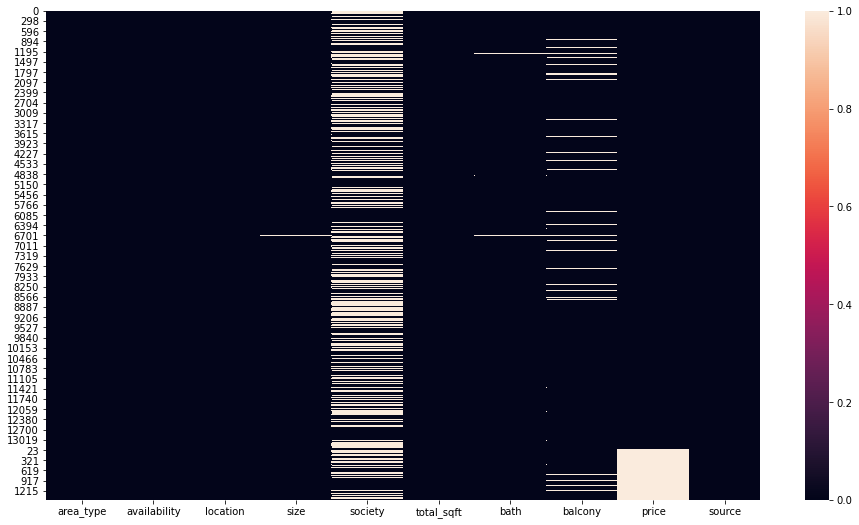

In [479]:
plt.figure(figsize=(16,9))
sns.heatmap(data.isnull())

In [622]:
data = data.drop('society', axis='columns')
data.shape, data.columns

((14271, 9),
 Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
        'balcony', 'price', 'source'],
       dtype='object'))

In [514]:
import re
def unit_conv(unit):
    print(unit)
    
    r=re.findall(r"-ACGPS", unit)
    for i in xrange(len(r)):
        print(r[i])#=r[i].lstrip("")
    array=np.array(r).astype(float)
    print(array)
    #new_unit1 = str(unit).split('-')[0]
    #new_unit2 = str(unit).split('-')[1]
    print('*'*20)
    #return new_unit1,new_unit2
#sqft = 10.764
#str(x).split(' ')[0]

In [515]:
#new1,new2 = 
unit_conv(data['total_sqft'])
#[item.split(':')[0] for item in items]

0       1056
1       2600
2       1440
3       1521
4       1200
        ... 
1475    1246
1476    1660
1477    1216
1478     996
1479    1150
Name: total_sqft, Length: 14271, dtype: object


TypeError: expected string or bytes-like object

In [524]:
z = []
for i in data['total_sqft']:
    # Replacing "," , convrting to lower and then splitting
    z.append(i.lower().split("p","s","a","c","g","-"))
    
print(z)

TypeError: split() takes at most 2 arguments (6 given)

In [623]:
def unit_conv(unit):
    org=0.0
    ofl=0.0
    sqf=0.0
    sqm=0.0
    sqy=0.0
    acr=0.0
    cen=0.0
    gun=0.0
    grn=0.0
    prc = 0.0
    print(unit,unit.isdigit())
    
    if (unit.isdigit() or unit.replace('.','',1).isdigit())  : org = float(unit)
    #if unit.replace('.','',1).isdigit() : ofl = float(unit)
    if '-' in unit     : sqf = (float(unit.split('-')[0])+float(unit.split('-')[1]))/2
    if 'Sq. M' in unit : sqm = float(unit.split('Sq. M')[0]) * 10.764 
    if 'Sq. Y' in unit : sqy = float(unit.split('Sq. Y')[0]) * 9
    if 'Acre' in unit  : acr = float(unit.split('Acre')[0]) * 43560 
    if 'Cent' in unit  : cen = float(unit.split('Cent')[0]) * 435.56
    if 'Gunt' in unit  : gun = float(unit.split('Gunt')[0]) * 1089 
    if 'Grou' in unit  : grn = float(unit.split('Grou')[0]) * 2400 
    if 'Per' in unit   : prc = float(unit.split('Per')[0])  * 272.25
    
    cal_sqft = org + ofl + sqf + sqm + sqy + acr + cen + gun + grn + prc
    if ~unit.isdigit() : print("0",unit,cal_sqft)
    return cal_sqft

In [624]:
#data['cal_sqft'] = unit_conv(data[['total_sqft']])

data['cal_sqft'] = data['total_sqft'].apply(lambda x: unit_conv(x))

1056 True
0 1056 1056.0
2600 True
0 2600 2600.0
1440 True
0 1440 1440.0
1521 True
0 1521 1521.0
1200 True
0 1200 1200.0
1170 True
0 1170 1170.0
2732 True
0 2732 2732.0
3300 True
0 3300 3300.0
1310 True
0 1310 1310.0
1020 True
0 1020 1020.0
1800 True
0 1800 1800.0
2785 True
0 2785 2785.0
1000 True
0 1000 1000.0
1100 True
0 1100 1100.0
2250 True
0 2250 2250.0
1175 True
0 1175 1175.0
1180 True
0 1180 1180.0
1540 True
0 1540 1540.0
2770 True
0 2770 2770.0
1100 True
0 1100 1100.0
600 True
0 600 600.0
1755 True
0 1755 1755.0
2800 True
0 2800 2800.0
1767 True
0 1767 1767.0
510 True
0 510 510.0
1250 True
0 1250 1250.0
660 True
0 660 660.0
1610 True
0 1610 1610.0
1151 True
0 1151 1151.0
1025 True
0 1025 1025.0
2100 - 2850 False
0 2100 - 2850 2475.0
1075 True
0 1075 1075.0
1760 True
0 1760 1760.0
1693 True
0 1693 1693.0
1925 True
0 1925 1925.0
700 True
0 700 700.0
1070 True
0 1070 1070.0
1724 True
0 1724 1724.0
1290 True
0 1290 1290.0
1143 True
0 1143 1143.0
1296 True
0 1296 1296.0
1254 True
0 1

2264 True
0 2264 2264.0
1033 True
0 1033 1033.0
810 True
0 810 810.0
1045 True
0 1045 1045.0
1337 True
0 1337 1337.0
1200 True
0 1200 1200.0
1580 True
0 1580 1580.0
1500 True
0 1500 1500.0
1640 True
0 1640 1640.0
1570 True
0 1570 1570.0
1470 True
0 1470 1470.0
1160 True
0 1160 1160.0
1050 True
0 1050 1050.0
1855 True
0 1855 1855.0
1460 True
0 1460 1460.0
1823 True
0 1823 1823.0
1094 True
0 1094 1094.0
1153 True
0 1153 1153.0
1325 True
0 1325 1325.0
1200 True
0 1200 1200.0
1590 True
0 1590 1590.0
1210 True
0 1210 1210.0
1200 True
0 1200 1200.0
1202 True
0 1202 1202.0
1202 True
0 1202 1202.0
1200 True
0 1200 1200.0
1688 True
0 1688 1688.0
1020 True
0 1020 1020.0
1185 True
0 1185 1185.0
1235 True
0 1235 1235.0
3205 True
0 3205 3205.0
1077 True
0 1077 1077.0
1415 True
0 1415 1415.0
2330 True
0 2330 2330.0
805 True
0 805 805.0
425 True
0 425 425.0
1155 True
0 1155 1155.0
5270 True
0 5270 5270.0
656 True
0 656 656.0
1100 True
0 1100 1100.0
1150 True
0 1150 1150.0
600 True
0 600 600.0
1468 Tr

1145 True
0 1145 1145.0
1093 True
0 1093 1093.0
1213 True
0 1213 1213.0
1654 True
0 1654 1654.0
1105 True
0 1105 1105.0
1611 True
0 1611 1611.0
1367 True
0 1367 1367.0
1010 True
0 1010 1010.0
750 True
0 750 750.0
1535 True
0 1535 1535.0
620 True
0 620 620.0
982 True
0 982 982.0
1700 True
0 1700 1700.0
1330 True
0 1330 1330.0
2500 True
0 2500 2500.0
1475 True
0 1475 1475.0
1410 True
0 1410 1410.0
440 True
0 440 440.0
1614 True
0 1614 1614.0
1363 True
0 1363 1363.0
650 True
0 650 650.0
1015 True
0 1015 1015.0
1156 True
0 1156 1156.0
1100 True
0 1100 1100.0
1455 True
0 1455 1455.0
930 True
0 930 930.0
1650 True
0 1650 1650.0
1200 True
0 1200 1200.0
700 True
0 700 700.0
2900 True
0 2900 2900.0
1890 True
0 1890 1890.0
2197 True
0 2197 2197.0
3522 True
0 3522 3522.0
1240 True
0 1240 1240.0
1440 True
0 1440 1440.0
650 True
0 650 650.0
764 True
0 764 764.0
900 True
0 900 900.0
1445 True
0 1445 1445.0
900 True
0 900 900.0
1030 True
0 1030 1030.0
1381 True
0 1381 1381.0
1100 True
0 1100 1100.0
1

1200 True
0 1200 1200.0
1238 True
0 1238 1238.0
1405 True
0 1405 1405.0
1690 True
0 1690 1690.0
1620 True
0 1620 1620.0
1673 True
0 1673 1673.0
1090 True
0 1090 1090.0
1112 True
0 1112 1112.0
1385 True
0 1385 1385.0
545 True
0 545 545.0
985 True
0 985 985.0
670 - 980 False
0 670 - 980 825.0
1080 True
0 1080 1080.0
1430 True
0 1430 1430.0
1050 True
0 1050 1050.0
2000 True
0 2000 2000.0
4800 True
0 4800 4800.0
1533 True
0 1533 1533.0
2800 True
0 2800 2800.0
2610 True
0 2610 2610.0
1750 True
0 1750 1750.0
1352 True
0 1352 1352.0
1754 True
0 1754 1754.0
1560 True
0 1560 1560.0
3012 True
0 3012 3012.0
3584 True
0 3584 3584.0
1470 True
0 1470 1470.0
1035 True
0 1035 1035.0
2400 True
0 2400 2400.0
1160 True
0 1160 1160.0
1100 True
0 1100 1100.0
1170 True
0 1170 1170.0
595 True
0 595 595.0
1650 True
0 1650 1650.0
1875 True
0 1875 1875.0
800 True
0 800 800.0
1375 True
0 1375 1375.0
1235 True
0 1235 1235.0
750 True
0 750 750.0
1400 True
0 1400 1400.0
1270 True
0 1270 1270.0
1105 True
0 1105 1105

1186 True
0 1186 1186.0
1230 True
0 1230 1230.0
600 True
0 600 600.0
1313 True
0 1313 1313.0
1250 True
0 1250 1250.0
1200 True
0 1200 1200.0
660 True
0 660 660.0
1036 True
0 1036 1036.0
2700 True
0 2700 2700.0
1100 True
0 1100 1100.0
1500 - 2400 False
0 1500 - 2400 1950.0
1500 True
0 1500 1500.0
525 True
0 525 525.0
1015 True
0 1015 1015.0
812 True
0 812 812.0
1360 True
0 1360 1360.0
2167 True
0 2167 2167.0
1200 True
0 1200 1200.0
1165 True
0 1165 1165.0
1274 True
0 1274 1274.0
1151 True
0 1151 1151.0
1060 True
0 1060 1060.0
1626 True
0 1626 1626.0
1035 True
0 1035 1035.0
1272 True
0 1272 1272.0
965 True
0 965 965.0
1600 True
0 1600 1600.0
1070 True
0 1070 1070.0
1570 True
0 1570 1570.0
117Sq. Yards False
0 117Sq. Yards 1053.0
780 True
0 780 780.0
1000 True
0 1000 1000.0
1200 True
0 1200 1200.0
7500 True
0 7500 7500.0
1700 True
0 1700 1700.0
1850 True
0 1850 1850.0
904 True
0 904 904.0
1121 True
0 1121 1121.0
1385 True
0 1385 1385.0
1270 True
0 1270 1270.0
1450 True
0 1450 1450.0
2400 

0 1200 1200.0
1500 True
0 1500 1500.0
2700 True
0 2700 2700.0
1350 True
0 1350 1350.0
1000 True
0 1000 1000.0
984 True
0 984 984.0
1819.18 False
0 1819.18 1819.18
900 True
0 900 900.0
1355 True
0 1355 1355.0
2145 True
0 2145 2145.0
2475 True
0 2475 2475.0
1118 True
0 1118 1118.0
910 True
0 910 910.0
1250 True
0 1250 1250.0
1304 True
0 1304 1304.0
1615 True
0 1615 1615.0
1400 True
0 1400 1400.0
1070 True
0 1070 1070.0
3500 True
0 3500 3500.0
1132 True
0 1132 1132.0
2000 True
0 2000 2000.0
2400 True
0 2400 2400.0
794 True
0 794 794.0
1090 True
0 1090 1090.0
1500 True
0 1500 1500.0
2059 True
0 2059 2059.0
1447 True
0 1447 1447.0
1269 True
0 1269 1269.0
4800 True
0 4800 4800.0
1070 True
0 1070 1070.0
1150 True
0 1150 1150.0
1208 True
0 1208 1208.0
1185 True
0 1185 1185.0
1200 True
0 1200 1200.0
888 True
0 888 888.0
1015 True
0 1015 1015.0
532 True
0 532 532.0
1060 True
0 1060 1060.0
700 True
0 700 700.0
902 True
0 902 902.0
600 True
0 600 600.0
1365 True
0 1365 1365.0
984 True
0 984 984.0


0 1825 1825.0
1320 True
0 1320 1320.0
3000 True
0 3000 3000.0
1490 True
0 1490 1490.0
1650 True
0 1650 1650.0
750 True
0 750 750.0
1400 True
0 1400 1400.0
4104 True
0 4104 4104.0
5000 True
0 5000 5000.0
3295 True
0 3295 3295.0
1150 True
0 1150 1150.0
1200 True
0 1200 1200.0
965 True
0 965 965.0
812 True
0 812 812.0
1100 True
0 1100 1100.0
1180 True
0 1180 1180.0
1145 True
0 1145 1145.0
1027 True
0 1027 1027.0
1215 True
0 1215 1215.0
1200 True
0 1200 1200.0
1015 True
0 1015 1015.0
2400 True
0 2400 2400.0
3000 True
0 3000 3000.0
3300 True
0 3300 3300.0
1076 True
0 1076 1076.0
1300 True
0 1300 1300.0
1300 True
0 1300 1300.0
1512 True
0 1512 1512.0
1053.4 False
0 1053.4 1053.4
540 - 670 False
0 540 - 670 605.0
1153 True
0 1153 1153.0
2080 True
0 2080 2080.0
1255 True
0 1255 1255.0
315Sq. Yards False
0 315Sq. Yards 2835.0
1583 True
0 1583 1583.0
1505 True
0 1505 1505.0
1365 True
0 1365 1365.0
1200 True
0 1200 1200.0
1810 True
0 1810 1810.0
440 True
0 440 440.0
975 True
0 975 975.0
1250 True

0 1080 1080.0
1046 True
0 1046 1046.0
1950 True
0 1950 1950.0
1610 True
0 1610 1610.0
2493 True
0 2493 2493.0
1151 True
0 1151 1151.0
1125 True
0 1125 1125.0
992 True
0 992 992.0
1000 True
0 1000 1000.0
2400 True
0 2400 2400.0
1850 True
0 1850 1850.0
1174 True
0 1174 1174.0
2466 - 2856 False
0 2466 - 2856 2661.0
1100 True
0 1100 1100.0
1095 True
0 1095 1095.0
3580 True
0 3580 3580.0
900 True
0 900 900.0
1082 True
0 1082 1082.0
1350 True
0 1350 1350.0
1314 True
0 1314 1314.0
1290 True
0 1290 1290.0
1010 True
0 1010 1010.0
2200 True
0 2200 2200.0
1636 True
0 1636 1636.0
1050 True
0 1050 1050.0
1200 True
0 1200 1200.0
1520 True
0 1520 1520.0
2500 True
0 2500 2500.0
1067 True
0 1067 1067.0
1060 True
0 1060 1060.0
955 True
0 955 955.0
1200 True
0 1200 1200.0
700 True
0 700 700.0
1366 True
0 1366 1366.0
1090 True
0 1090 1090.0
1250 True
0 1250 1250.0
3600 True
0 3600 3600.0
950 True
0 950 950.0
1470 True
0 1470 1470.0
1250 True
0 1250 1250.0
800 True
0 800 800.0
1494 True
0 1494 1494.0
1445 

0 1381 1381.0
1085 True
0 1085 1085.0
905 True
0 905 905.0
1685 True
0 1685 1685.0
1200 True
0 1200 1200.0
1151 True
0 1151 1151.0
3532 True
0 3532 3532.0
1665 True
0 1665 1665.0
800 True
0 800 800.0
1050 True
0 1050 1050.0
1030 True
0 1030 1030.0
1257 True
0 1257 1257.0
1600 True
0 1600 1600.0
1465 True
0 1465 1465.0
1650 True
0 1650 1650.0
680 True
0 680 680.0
1230 True
0 1230 1230.0
1300 True
0 1300 1300.0
1000 True
0 1000 1000.0
1146 True
0 1146 1146.0
1200 True
0 1200 1200.0
2601 True
0 2601 2601.0
2159 True
0 2159 2159.0
1255 True
0 1255 1255.0
1200 True
0 1200 1200.0
1040 True
0 1040 1040.0
1500 True
0 1500 1500.0
906 True
0 906 906.0
1180 True
0 1180 1180.0
1200 True
0 1200 1200.0
850 True
0 850 850.0
1200 True
0 1200 1200.0
1374 True
0 1374 1374.0
4700 True
0 4700 4700.0
613 - 648 False
0 613 - 648 630.5
2400 True
0 2400 2400.0
1200 True
0 1200 1200.0
2384 True
0 2384 2384.0
1033 True
0 1033 1033.0
1200 True
0 1200 1200.0
2017 True
0 2017 2017.0
1500 True
0 1500 1500.0
700 Tru

1200 True
0 1200 1200.0
1150 True
0 1150 1150.0
937 True
0 937 937.0
1490 True
0 1490 1490.0
4856 True
0 4856 4856.0
4003 True
0 4003 4003.0
1100 True
0 1100 1100.0
1000 True
0 1000 1000.0
1060 True
0 1060 1060.0
1047 True
0 1047 1047.0
1200 True
0 1200 1200.0
1420 True
0 1420 1420.0
1539 True
0 1539 1539.0
1550 True
0 1550 1550.0
1555 True
0 1555 1555.0
600 True
0 600 600.0
1553 True
0 1553 1553.0
920 True
0 920 920.0
1740 True
0 1740 1740.0
1855 True
0 1855 1855.0
1724 True
0 1724 1724.0
1020 True
0 1020 1020.0
1000 True
0 1000 1000.0
1250 True
0 1250 1250.0
1450 True
0 1450 1450.0
1200 True
0 1200 1200.0
1140 True
0 1140 1140.0
900 True
0 900 900.0
550 True
0 550 550.0
1450 True
0 1450 1450.0
1500 True
0 1500 1500.0
700 True
0 700 700.0
1200 True
0 1200 1200.0
1050 True
0 1050 1050.0
1600 True
0 1600 1600.0
1625 True
0 1625 1625.0
1492 True
0 1492 1492.0
2830 - 2882 False
0 2830 - 2882 2856.0
1489 True
0 1489 1489.0
1560 True
0 1560 1560.0
1140 True
0 1140 1140.0
1431 True
0 1431 14

1050 True
0 1050 1050.0
1595 True
0 1595 1595.0
1350 True
0 1350 1350.0
1204 True
0 1204 1204.0
2990 True
0 2990 2990.0
1035 True
0 1035 1035.0
1000 True
0 1000 1000.0
1457 True
0 1457 1457.0
1100 True
0 1100 1100.0
1655 True
0 1655 1655.0
1691.2 False
0 1691.2 1691.2
1215 True
0 1215 1215.0
1010 - 1300 False
0 1010 - 1300 1155.0
1639 True
0 1639 1639.0
1685 True
0 1685 1685.0
1008 True
0 1008 1008.0
1100 True
0 1100 1100.0
2122 True
0 2122 2122.0
1050 True
0 1050 1050.0
1230 True
0 1230 1230.0
1240 True
0 1240 1240.0
1252 True
0 1252 1252.0
1374 True
0 1374 1374.0
500 True
0 500 500.0
1200 True
0 1200 1200.0
1040 True
0 1040 1040.0
1350 True
0 1350 1350.0
4003 True
0 4003 4003.0
2400 True
0 2400 2400.0
1560 True
0 1560 1560.0
1151 True
0 1151 1151.0
1360 True
0 1360 1360.0
1250 True
0 1250 1250.0
1110 True
0 1110 1110.0
1015 True
0 1015 1015.0
1351 True
0 1351 1351.0
960 True
0 960 960.0
1110 True
0 1110 1110.0
1680 True
0 1680 1680.0
2400 True
0 2400 2400.0
11000 True
0 11000 11000.0

2008 True
0 2008 2008.0
1240 True
0 1240 1240.0
1020 True
0 1020 1020.0
2095 True
0 2095 2095.0
1362 True
0 1362 1362.0
694 True
0 694 694.0
1404 True
0 1404 1404.0
1192 True
0 1192 1192.0
1850 True
0 1850 1850.0
1050 True
0 1050 1050.0
1259 True
0 1259 1259.0
1000 True
0 1000 1000.0
985 True
0 985 985.0
850 True
0 850 850.0
1650 True
0 1650 1650.0
2400 True
0 2400 2400.0
1900 True
0 1900 1900.0
1367 True
0 1367 1367.0
1210 True
0 1210 1210.0
1190 True
0 1190 1190.0
1175 True
0 1175 1175.0
2800 True
0 2800 2800.0
1140 True
0 1140 1140.0
1095 True
0 1095 1095.0
782 True
0 782 782.0
1435 True
0 1435 1435.0
725 True
0 725 725.0
1600 True
0 1600 1600.0
1200 True
0 1200 1200.0
3205 True
0 3205 3205.0
720 True
0 720 720.0
1674 True
0 1674 1674.0
860 True
0 860 860.0
1703 True
0 1703 1703.0
1350 True
0 1350 1350.0
1145 True
0 1145 1145.0
1216 True
0 1216 1216.0
1100 True
0 1100 1100.0
2425 True
0 2425 2425.0
2700 True
0 2700 2700.0
1600 True
0 1600 1600.0
1510 True
0 1510 1510.0
3033 True
0 3

1445 True
0 1445 1445.0
1250 True
0 1250 1250.0
1500 True
0 1500 1500.0
1705 True
0 1705 1705.0
2200 True
0 2200 2200.0
2925 True
0 2925 2925.0
1800 True
0 1800 1800.0
7200 True
0 7200 7200.0
1830 True
0 1830 1830.0
1450 True
0 1450 1450.0
1259 True
0 1259 1259.0
1260 True
0 1260 1260.0
2500 True
0 2500 2500.0
1919 True
0 1919 1919.0
1400 True
0 1400 1400.0
2050 True
0 2050 2050.0
1050 True
0 1050 1050.0
1000 True
0 1000 1000.0
1640 True
0 1640 1640.0
1488 True
0 1488 1488.0
1265 True
0 1265 1265.0
1640 True
0 1640 1640.0
1719.3 False
0 1719.3 1719.3
1200 True
0 1200 1200.0
1180 True
0 1180 1180.0
1700 True
0 1700 1700.0
1464 True
0 1464 1464.0
1800 True
0 1800 1800.0
1495 True
0 1495 1495.0
1225 True
0 1225 1225.0
1050 True
0 1050 1050.0
1691 True
0 1691 1691.0
2250 True
0 2250 2250.0
3700 True
0 3700 3700.0
1244 True
0 1244 1244.0
750 True
0 750 750.0
1190 True
0 1190 1190.0
765 True
0 765 765.0
730 True
0 730 730.0
1405 True
0 1405 1405.0
1350 True
0 1350 1350.0
500 True
0 500 500.0

1244 True
0 1244 1244.0
1000 True
0 1000 1000.0
1400 True
0 1400 1400.0
1000 True
0 1000 1000.0
1056 True
0 1056 1056.0
2470 - 2790 False
0 2470 - 2790 2630.0
1225 True
0 1225 1225.0
2790 True
0 2790 2790.0
2800 True
0 2800 2800.0
1683 True
0 1683 1683.0
1250 True
0 1250 1250.0
1305 True
0 1305 1305.0
3009 True
0 3009 3009.0
1150 True
0 1150 1150.0
1654 True
0 1654 1654.0
4500 True
0 4500 4500.0
1890 True
0 1890 1890.0
1069 True
0 1069 1069.0
750 True
0 750 750.0
675 True
0 675 675.0
2400 True
0 2400 2400.0
1200 True
0 1200 1200.0
1410 True
0 1410 1410.0
1680 True
0 1680 1680.0
3500 True
0 3500 3500.0
1700 True
0 1700 1700.0
2200 True
0 2200 2200.0
1595 True
0 1595 1595.0
1480 True
0 1480 1480.0
1092 True
0 1092 1092.0
1866 True
0 1866 1866.0
3895 True
0 3895 3895.0
1683 True
0 1683 1683.0
545 True
0 545 545.0
1340 True
0 1340 1340.0
1100 True
0 1100 1100.0
2000 True
0 2000 2000.0
1185 True
0 1185 1185.0
1730 True
0 1730 1730.0
1450 True
0 1450 1450.0
1862 True
0 1862 1862.0
4000 True


991 True
0 991 991.0
1493 True
0 1493 1493.0
2495 True
0 2495 2495.0
1080 True
0 1080 1080.0
814 True
0 814 814.0
1025 True
0 1025 1025.0
3075 True
0 3075 3075.0
1900 True
0 1900 1900.0
1760 True
0 1760 1760.0
4000 True
0 4000 4000.0
3090 True
0 3090 3090.0
2700 True
0 2700 2700.0
1175 True
0 1175 1175.0
4235 True
0 4235 4235.0
1100 True
0 1100 1100.0
1200 True
0 1200 1200.0
1450 True
0 1450 1450.0
1810 True
0 1810 1810.0
1426 True
0 1426 1426.0
2400 True
0 2400 2400.0
1100 True
0 1100 1100.0
650 True
0 650 650.0
900 True
0 900 900.0
1360 True
0 1360 1360.0
674 True
0 674 674.0
1655 True
0 1655 1655.0
1300 True
0 1300 1300.0
936 True
0 936 936.0
1277 True
0 1277 1277.0
1200 True
0 1200 1200.0
1015 True
0 1015 1015.0
1153 True
0 1153 1153.0
1035 True
0 1035 1035.0
3300 True
0 3300 3300.0
1150 True
0 1150 1150.0
1020 True
0 1020 1020.0
3630 - 3800 False
0 3630 - 3800 3715.0
1160 True
0 1160 1160.0
1225 True
0 1225 1225.0
5000 True
0 5000 5000.0
1600 True
0 1600 1600.0
600 True
0 600 600.

0 1027 1027.0
3730 True
0 3730 3730.0
1145 True
0 1145 1145.0
1260 True
0 1260 1260.0
1500 True
0 1500 1500.0
1737 True
0 1737 1737.0
3484 - 3550 False
0 3484 - 3550 3517.0
1600 True
0 1600 1600.0
1500 True
0 1500 1500.0
1120 True
0 1120 1120.0
1200 True
0 1200 1200.0
1030 True
0 1030 1030.0
2500 True
0 2500 2500.0
1057 True
0 1057 1057.0
1460 True
0 1460 1460.0
1075 True
0 1075 1075.0
1080 True
0 1080 1080.0
3626 True
0 3626 3626.0
5100 True
0 5100 5100.0
1139.7 False
0 1139.7 1139.7
1074 True
0 1074 1074.0
1200 True
0 1200 1200.0
2425 True
0 2425 2425.0
1323 True
0 1323 1323.0
900 True
0 900 900.0
740 True
0 740 740.0
38Guntha False
0 38Guntha 41382.0
1550 True
0 1550 1550.0
1588 True
0 1588 1588.0
2300 True
0 2300 2300.0
3600 True
0 3600 3600.0
1308 True
0 1308 1308.0
1340 True
0 1340 1340.0
3280 True
0 3280 3280.0
2170 True
0 2170 2170.0
1719 True
0 1719 1719.0
1200 True
0 1200 1200.0
1090 True
0 1090 1090.0
1500 True
0 1500 1500.0
1660 True
0 1660 1660.0
1247 True
0 1247 1247.0
15

0 1524 1524.0
2236 True
0 2236 2236.0
2955 True
0 2955 2955.0
1410 True
0 1410 1410.0
1205 True
0 1205 1205.0
1270 True
0 1270 1270.0
1353 True
0 1353 1353.0
1200 True
0 1200 1200.0
1250 True
0 1250 1250.0
1950.2 False
0 1950.2 1950.2
1157 True
0 1157 1157.0
712 - 938 False
0 712 - 938 825.0
602 True
0 602 602.0
3000 True
0 3000 3000.0
1108 True
0 1108 1108.0
1040 True
0 1040 1040.0
1451 True
0 1451 1451.0
850 True
0 850 850.0
2171.66 False
0 2171.66 2171.66
900 True
0 900 900.0
720 True
0 720 720.0
1573 True
0 1573 1573.0
1026 True
0 1026 1026.0
1400 True
0 1400 1400.0
2100 True
0 2100 2100.0
1150 True
0 1150 1150.0
1500 True
0 1500 1500.0
2400 True
0 2400 2400.0
1200 True
0 1200 1200.0
1125 True
0 1125 1125.0
1783 - 1878 False
0 1783 - 1878 1830.5
1100 True
0 1100 1100.0
120Sq. Yards False
0 120Sq. Yards 1080.0
1105 True
0 1105 1105.0
1110 True
0 1110 1110.0
708 True
0 708 708.0
1600 True
0 1600 1600.0
3122 True
0 3122 3122.0
1205 True
0 1205 1205.0
1450 True
0 1450 1450.0
750 True
0

0 1280 1280.0
1750 True
0 1750 1750.0
1500 True
0 1500 1500.0
1245 True
0 1245 1245.0
1025 True
0 1025 1025.0
1945 True
0 1945 1945.0
1640 True
0 1640 1640.0
1348 True
0 1348 1348.0
1100 True
0 1100 1100.0
1616 True
0 1616 1616.0
1855 True
0 1855 1855.0
1255 True
0 1255 1255.0
2040 True
0 2040 2040.0
2400 True
0 2400 2400.0
1195 True
0 1195 1195.0
1022 True
0 1022 1022.0
760 True
0 760 760.0
1264 True
0 1264 1264.0
1650 True
0 1650 1650.0
1020 True
0 1020 1020.0
950 True
0 950 950.0
2710 True
0 2710 2710.0
1936 True
0 1936 1936.0
1075 True
0 1075 1075.0
1223 True
0 1223 1223.0
1500 True
0 1500 1500.0
1050 True
0 1050 1050.0
2100 True
0 2100 2100.0
1650 True
0 1650 1650.0
1495 True
0 1495 1495.0
1605 True
0 1605 1605.0
1270 True
0 1270 1270.0
1081 True
0 1081 1081.0
1600 True
0 1600 1600.0
1596 True
0 1596 1596.0
600 True
0 600 600.0
1557 True
0 1557 1557.0
1410 True
0 1410 1410.0
1984 True
0 1984 1984.0
1196 True
0 1196 1196.0
2259 True
0 2259 2259.0
1720 True
0 1720 1720.0
600 True
0 

0 1180 1180.0
1349 True
0 1349 1349.0
2000 True
0 2000 2000.0
4000 True
0 4000 4000.0
3450 True
0 3450 3450.0
1300 True
0 1300 1300.0
2424 True
0 2424 2424.0
1230 True
0 1230 1230.0
2119 True
0 2119 2119.0
1600 True
0 1600 1600.0
750 True
0 750 750.0
1225 True
0 1225 1225.0
5Acres False
0 5Acres 217800.0
3600 True
0 3600 3600.0
1350 True
0 1350 1350.0
1025 True
0 1025 1025.0
920 True
0 920 920.0
1140 True
0 1140 1140.0
1200 True
0 1200 1200.0
1350 True
0 1350 1350.0
1750 True
0 1750 1750.0
638 True
0 638 638.0
1130 True
0 1130 1130.0
1984 True
0 1984 1984.0
1163 True
0 1163 1163.0
1390 True
0 1390 1390.0
400 True
0 400 400.0
864 True
0 864 864.0
540 True
0 540 540.0
950 True
0 950 950.0
1171 True
0 1171 1171.0
3075 True
0 3075 3075.0
1692 True
0 1692 1692.0
3321 True
0 3321 3321.0
1140 True
0 1140 1140.0
1260 True
0 1260 1260.0
700 True
0 700 700.0
1485 True
0 1485 1485.0
660 - 690 False
0 660 - 690 675.0
1090 True
0 1090 1090.0
978 True
0 978 978.0
2200 True
0 2200 2200.0
1700 True
0 

0 1335 1335.0
1650 True
0 1650 1650.0
778 True
0 778 778.0
1575 True
0 1575 1575.0
781 True
0 781 781.0
1200 True
0 1200 1200.0
1690 True
0 1690 1690.0
1270 True
0 1270 1270.0
1013 True
0 1013 1013.0
1298 True
0 1298 1298.0
1220 True
0 1220 1220.0
1370 True
0 1370 1370.0
2790 True
0 2790 2790.0
1184 True
0 1184 1184.0
2996 True
0 2996 2996.0
1740 True
0 1740 1740.0
920 True
0 920 920.0
1352 True
0 1352 1352.0
1313 True
0 1313 1313.0
1105 True
0 1105 1105.0
2400 True
0 2400 2400.0
8000 True
0 8000 8000.0
992 True
0 992 992.0
1410 True
0 1410 1410.0
1065 True
0 1065 1065.0
1386 True
0 1386 1386.0
1815 True
0 1815 1815.0
1500 True
0 1500 1500.0
1040 True
0 1040 1040.0
1000 True
0 1000 1000.0
1610 True
0 1610 1610.0
1140 True
0 1140 1140.0
1521 True
0 1521 1521.0
1245 True
0 1245 1245.0
1200 True
0 1200 1200.0
1195 True
0 1195 1195.0
1210 True
0 1210 1210.0
2059 True
0 2059 2059.0
1500 True
0 1500 1500.0
1166 True
0 1166 1166.0
1788 True
0 1788 1788.0
2830 - 2882 False
0 2830 - 2882 2856.0

In [606]:
data['cal_sqft'].value_counts()

1200.00    905
1500.00    236
1100.00    229
2400.00    225
600.00     198
          ... 
1542.14      1
2884.00      1
2120.00      1
7400.00      1
1181.70      1
Name: cal_sqft, Length: 2126, dtype: int64

In [607]:
data[['total_sqft','cal_sqft']]
data[['total_sqft','cal_sqft']].to_csv('sqftcalc.csv')

In [ ]:
#data['persqft']=data['price']/data['cal_sqft']
#data.loc[data['source'] =='train', 'persqft'] = data['price']/data['cal_sqft']

In [625]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,source,cal_sqft
0,Super built-up Area,Not Ready,Electronic City Phase II,2,1056,2.0,1.0,39.07,train,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600,5.0,3.0,120.00,train,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3,1440,2.0,3.0,62.00,train,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521,3.0,1.0,95.00,train,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2,1200,2.0,1.0,51.00,train,1200.0


In [626]:
data.isna().sum().reset_index(name="count").query("count > 0")

,index,count
3,size,18
5,bath,80
6,balcony,674
7,price,1480


In [612]:
display(data[data['size'].isna()])
display(data.loc[(data['cal_sqft']==1800)])

,area_type,availability,location,size,total_sqft,bath,balcony,price,source,cal_sqft
579,Plot Area,Not Ready,Sarjapur Road,NaN,1200 - 2400,NaN,NaN,34.185,train,1800.0
1775,Plot Area,Not Ready,IVC Road,NaN,2000 - 5634,NaN,NaN,124.000,train,3817.0
2264,Plot Area,Not Ready,Banashankari,NaN,2400,NaN,NaN,460.000,train,2400.0
2809,Plot Area,Not Ready,Sarjapur Road,NaN,1200 - 2400,NaN,NaN,28.785,train,1800.0
2862,Plot Area,Not Ready,Devanahalli,NaN,1500 - 2400,NaN,NaN,46.800,train,1950.0
5333,Plot Area,Not Ready,Devanahalli,NaN,2100 - 5405,NaN,NaN,177.115,train,3752.5
6423,Plot Area,Not Ready,Whitefield,NaN,2324,NaN,NaN,26.730,train,2324.0
6636,Plot Area,Not Ready,Jigani,NaN,1500,NaN,NaN,25.490,train,1500.0
6719,Plot Area,Not Ready,Hoskote,NaN,800 - 2660,NaN,NaN,28.545,train,1730.0
7680,Plot Area,Not Ready,Kasavanhalli,NaN,5000,NaN,NaN,400.000,train,5000.0


,area_type,availability,location,size,total_sqft,bath,balcony,price,source,cal_sqft
10,Super built-up Area,Not Ready,Whitefield,3,1800,2.0,2.0,70.0,train,1800.0
110,Super built-up Area,Ready To Move,Lakshmiamma Garden,3,1800,3.0,3.0,120.0,train,1800.0
193,Plot Area,Ready To Move,Ejipura,7,1800,7.0,1.0,250.0,train,1800.0
348,Super built-up Area,Ready To Move,Prashanth Nagar,3,1800,3.0,0.0,150.0,train,1800.0
378,Super built-up Area,Ready To Move,Electronic City,3,1800,3.0,2.0,95.0,train,1800.0
...,...,...,...,...,...,...,...,...,...,...
1317,Built-up Area,Ready To Move,Yelahanka,5,1800,3.0,2.0,NaN,test,1800.0
1324,Super built-up Area,Ready To Move,Sector 2 HSR Layout,3,1800,3.0,3.0,NaN,test,1800.0
1388,Plot Area,Not Ready,Sarjapur Road,4,1800,4.0,3.0,NaN,test,1800.0
1442,Built-up Area,Ready To Move,TC Palaya,4,1800,3.0,1.0,NaN,test,1800.0


In [631]:
#approximate
#data['balcony'] = 
display(data['balcony'].value_counts())
display(data['balcony'].mode()[0])
data['balcony'] = data['balcony'].fillna(data['balcony'].mode()[0])
data.isna().sum().reset_index(name="count").query("count > 0")

2.0    5391
1.0    5247
3.0    1819
0.0    1140
Name: balcony, dtype: int64

2.0

,index,count
3,size,18
5,bath,80
7,price,1480


In [615]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14271 entries, 0 to 1479
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     14271 non-null  object 
 1   availability  14271 non-null  object 
 2   location      14271 non-null  object 
 3   size          14253 non-null  object 
 4   total_sqft    14271 non-null  object 
 5   bath          14191 non-null  float64
 6   balcony       14271 non-null  float64
 7   price         12791 non-null  float64
 8   source        14271 non-null  object 
 9   cal_sqft      14271 non-null  float64
dtypes: float64(4), object(6)
memory usage: 1.2+ MB


In [633]:
#approximate
#data['size'] = data['size'].astype(float)
#data['size'] = data['size'].fillna(data['size'].mean())
#data.isna().sum().reset_index(name="count").query("count > 0")

display(data['size'].value_counts())
display(data['size'].mode()[0])
data['size'] = data['size'].fillna(data['size'].mode()[0])
data.isna().sum().reset_index(name="count").query("count > 0")

2     5824
3     5199
4     1572
1      711
5      393
6      243
7      112
8      102
9       67
10      17
11       4
16       2
18       1
13       1
12       1
19       1
27       1
43       1
14       1
Name: size, dtype: int64

'2'

,index,count
5,bath,80
7,price,1480


In [634]:
display(data[data['bath'].isna()])

,area_type,availability,location,size,total_sqft,bath,balcony,price,source,cal_sqft
56,Built-up Area,Not Ready,Devanahalli,4,3010 - 3410,NaN,2.0,192.000,train,3210.0
81,Built-up Area,Not Ready,Hennur Road,4,2957 - 3450,NaN,2.0,224.500,train,3203.5
224,Super built-up Area,Not Ready,Devanahalli,3,1520 - 1740,NaN,2.0,74.820,train,1630.0
344,Super built-up Area,Not Ready,Kanakpura Road,1,525,NaN,2.0,21.530,train,525.0
579,Plot Area,Not Ready,Sarjapur Road,2,1200 - 2400,NaN,2.0,34.185,train,1800.0
...,...,...,...,...,...,...,...,...,...,...
817,Super built-up Area,Not Ready,Binny Pete,4,2695 - 2940,NaN,2.0,NaN,test,2817.5
1155,Super built-up Area,Not Ready,Thanisandra,4,2259,NaN,2.0,NaN,test,2259.0
1160,Plot Area,Not Ready,Hosa Road,2,600 - 4000,NaN,2.0,NaN,test,2300.0
1231,Super built-up Area,Not Ready,Binny Pete,4,2695 - 2940,NaN,2.0,NaN,test,2817.5


In [635]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14271 entries, 0 to 1479
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     14271 non-null  object 
 1   availability  14271 non-null  object 
 2   location      14271 non-null  object 
 3   size          14271 non-null  object 
 4   total_sqft    14271 non-null  object 
 5   bath          14191 non-null  float64
 6   balcony       14271 non-null  float64
 7   price         12791 non-null  float64
 8   source        14271 non-null  object 
 9   cal_sqft      14271 non-null  float64
dtypes: float64(4), object(6)
memory usage: 1.2+ MB


In [637]:
#approximate
display(data['bath'].value_counts())
display(data['bath'].mode()[0])
data['bath'] = data['bath'].fillna(data['bath'].mode()[0])
data.isna().sum().reset_index(name="count").query("count > 0")

2.0     7290
3.0     3551
4.0     1347
1.0      845
5.0      582
6.0      301
7.0      113
8.0       73
9.0       51
10.0      17
12.0       7
13.0       3
11.0       3
16.0       3
27.0       1
18.0       1
40.0       1
15.0       1
14.0       1
Name: bath, dtype: int64

2.0

,index,count
7,price,1480


In [638]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,source,cal_sqft
0,Super built-up Area,Not Ready,Electronic City Phase II,2,1056,2.0,1.0,39.07,train,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600,5.0,3.0,120.00,train,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3,1440,2.0,3.0,62.00,train,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521,3.0,1.0,95.00,train,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2,1200,2.0,1.0,51.00,train,1200.0


In [639]:
rdy_data = data.copy()

In [644]:
data = data.drop(columns=['location','total_sqft'])

In [645]:
data.head()

,area_type,availability,size,bath,balcony,price,source,cal_sqft
0,Super built-up Area,Not Ready,2,2.0,1.0,39.07,train,1056.0
1,Plot Area,Ready To Move,4,5.0,3.0,120.00,train,2600.0
2,Built-up Area,Ready To Move,3,2.0,3.0,62.00,train,1440.0
3,Super built-up Area,Ready To Move,3,3.0,1.0,95.00,train,1521.0
4,Super built-up Area,Ready To Move,2,2.0,1.0,51.00,train,1200.0


In [650]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14271 entries, 0 to 1479
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     14271 non-null  object 
 1   availability  14271 non-null  object 
 2   size          14271 non-null  object 
 3   bath          14271 non-null  float64
 4   balcony       14271 non-null  float64
 5   price         12791 non-null  float64
 6   source        14271 non-null  object 
 7   cal_sqft      14271 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1003.4+ KB


In [652]:
data['bath'] = data['bath'].astype('O')

In [654]:
data['balcony'] = data['balcony'].astype('O')

In [655]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14271 entries, 0 to 1479
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     14271 non-null  object 
 1   availability  14271 non-null  object 
 2   size          14271 non-null  object 
 3   bath          14271 non-null  object 
 4   balcony       14271 non-null  object 
 5   price         12791 non-null  float64
 6   source        14271 non-null  object 
 7   cal_sqft      14271 non-null  float64
dtypes: float64(2), object(6)
memory usage: 1003.4+ KB


In [657]:
#[display(data[i].value_counts()) for i in data.columns]

In [658]:
numeric_data_columns = data.select_dtypes(include = np.number).drop(columns = "price").columns
numeric_data_columns

Index(['cal_sqft'], dtype='object')

In [659]:
category_data_columns = data.select_dtypes(exclude = np.number).drop(columns=["source"]).columns
category_data_columns

Index(['area_type', 'availability', 'size', 'bath', 'balcony'], dtype='object')

In [661]:
preprocess_data_columns = pd.get_dummies(data[category_data_columns])

In [662]:
preprocess_data_columns.head()

,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Not Ready,availability_Ready To Move,size_1,size_10,size_11,size_12,...,bath_14.0,bath_15.0,bath_16.0,bath_18.0,bath_27.0,bath_40.0,balcony_0.0,balcony_1.0,balcony_2.0,balcony_3.0
0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [664]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [665]:
preprocess_numeric_data_columns = pd.DataFrame(scaler.fit_transform(data[numeric_data_columns]), columns=numeric_data_columns)

In [666]:
preprocess_numeric_data_columns.head()

,cal_sqft
0,-0.050925
1,0.041035
2,-0.028054
3,-0.023230
4,-0.042349


In [668]:
preprocess_data_columns.shape, preprocess_numeric_data_columns.shape, data.shape

((14271, 48), (14271, 1), (14271, 8))

In [669]:
preprocess_data_columns.index, preprocess_numeric_data_columns.index, data.index

(Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
             ...
             1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479],
            dtype='int64', length=14271),
 RangeIndex(start=0, stop=14271, step=1),
 Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
             ...
             1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479],
            dtype='int64', length=14271))

In [670]:
data.reset_index(inplace=True)
data.drop(columns='index',inplace=True)
data.shape, data.index

((14271, 8), RangeIndex(start=0, stop=14271, step=1))

In [671]:
preprocess_data_columns.reset_index(inplace=True)
preprocess_data_columns.drop(columns='index',inplace=True)
preprocess_data_columns.shape, preprocess_data_columns.index

((14271, 48), RangeIndex(start=0, stop=14271, step=1))

In [672]:
preprocess_data_columns.shape, preprocess_numeric_data_columns.shape, data.shape

((14271, 48), (14271, 1), (14271, 8))

In [673]:
final_preprocessed = pd.concat([preprocess_data_columns, preprocess_numeric_data_columns, data[["price", "source"]]], axis = 1)

In [674]:
train_preprocessed = final_preprocessed[final_preprocessed["source"]=="train"]
test_preprocessed = final_preprocessed[final_preprocessed["source"]=="test"]

In [675]:
train_preprocessed = train_preprocessed.drop(columns = ["source"])
test_preprocessed = test_preprocessed.drop(columns = ["source"])

In [676]:
train_preprocessed.shape, test_preprocessed.shape

((12791, 50), (1480, 50))

In [677]:
model = LinearRegression()
X = train_preprocessed.drop(columns=["price"])
y = train_preprocessed["price"]
model.fit(X,y)

LinearRegression()

In [678]:
y_pred = model.predict(X)
print(mean_squared_error(y,y_pred,squared=False))
print(np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y +1)).mean()))

126.24722299254374
0.22447452243856758


In [682]:
X_test = test_preprocessed.drop(columns=["price"])
y_test_pred = model.predict(X_test)

In [683]:
submission = pd.DataFrame()
submission["price"] = y_test_pred
submission[submission['price']<0]

,price


In [684]:
submission.to_csv("test2_linear_regression_result.csv", index = False)

In [685]:
submission.index

RangeIndex(start=0, stop=1480, step=1)

In [686]:
submission

,price
0,64.890625
1,252.224609
2,360.599609
3,111.683594
4,54.841797
...,...
1475,54.861328
1476,121.800781
1477,64.888672
1478,51.578125


In [687]:
submission.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   1480 non-null   float64
dtypes: float64(1)
memory usage: 11.7 KB


In [690]:
round(submission['price'],2)
submission['price'] = round(submission['price'],2)
submission.to_csv("test3_linear_regression_result.csv", index = False)